Bùi Quang Hậu_19144255_Fashion

In [ ]:
import numpy as np #tinh toan
import pandas as pd #xu li bang
import seaborn as sns #do thi du lieu
import matplotlib.pyplot as plt # ve
from sklearn.preprocessing import StandardScaler # xu li xu lieu cho dong deu
from sklearn.model_selection import train_test_split # chia du lieu
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM # nhom chuan
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #### chỉ cho 1 giá trị (1) hiện lên
from keras import callbacks #
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # đo lường
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

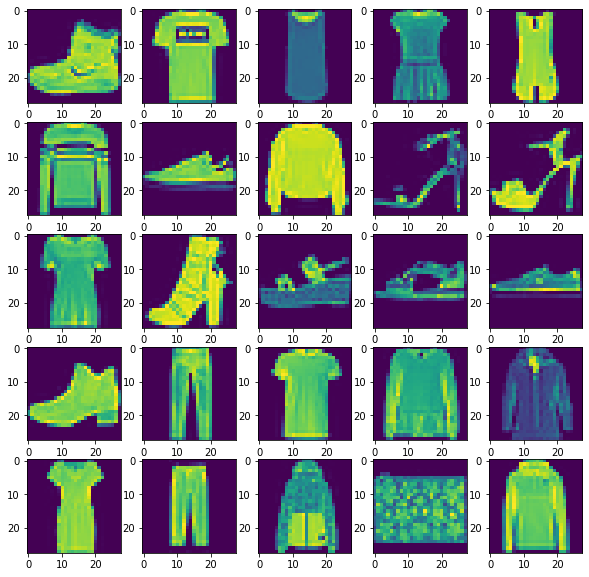

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,+1+i)
 plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 512)               66048     
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 171,658
Trainable params: 171,658
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=SGD (learning_rate=0.02,momentum=0.9)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=30,batch_size=64,validation_data=(x_test,y_test),verbose=1)
score=model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là:',score[0])
print('Độ chính xác kiểm tra là:',score[1])

Epoch 1/30
938/938 [==============================] - 6s 6ms/step - loss: 0.5342 - accuracy: 0.8088 - val_loss: 0.4779 - val_accuracy: 0.8203
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3818 - accuracy: 0.8594 - val_loss: 0.3969 - val_accuracy: 0.8577
Epoch 3/30
938/938 [==============================] - 6s 6ms/step - loss: 0.3423 - accuracy: 0.8737 - val_loss: 0.3709 - val_accuracy: 0.8665
Epoch 4/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3231 - accuracy: 0.8798 - val_loss: 0.3873 - val_accuracy: 0.8610
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2997 - accuracy: 0.8876 - val_loss: 0.3519 - val_accuracy: 0.8720
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 0.2862 - accuracy: 0.8924 - val_loss: 0.3512 - val_accuracy: 0.8735
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.2728 - accuracy: 0.8979 - val_loss: 0.3456 - val_accuracy: 0.8754
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/fashion/final_fashion.h5')

In [ ]:
model=load_model('/content/drive/MyDrive/Colab Notebooks/fashion/final_fashion.h5')

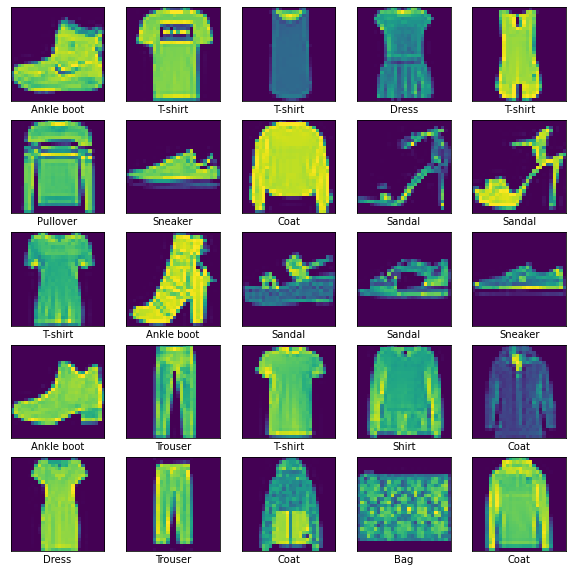

In [ ]:
fashion={0:'T-shirt',
         1:'Trouser',
         2:'Pullover',
         3:'Dress',
         4:'Coat',
         5:'Sandal',
         6:'Shirt',
         7:'Sneaker',
         8:'Bag',
         9:'Ankle boot'}

plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,+1+i)
 plt.xticks([])
 plt.yticks([])
 (x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
 plt.imshow(x_train[i])
 x_train=x_train.reshape(60000,784)
 x_train=x_train.astype('float')
 x_train/=255
 plt.xlabel(fashion[np.argmax(model.predict(x_train),axis=1)[i]])
plt.show()

9


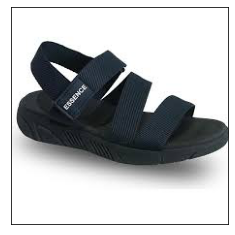

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
fashion={0:'T-shirt',
         1:'Trouser',
         2:'Pullover',
         3:'Dress',
         4:'Coat',
         5:'Sandal',
         6:'Shirt',
         7:'Sneaker',
         8:'Bag',
         9:'Ankle boot'}

url='/content/sandal.jpg'
img=load_img(url,target_size=(28,28),color_mode='grayscale')
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape((1,784))
img=img.astype('float')
img=img/255
print(np.argmax(model.predict(img)))